In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

import os
import io
import sys
import ast
sys.path.append(os.path.join(os.getcwd(), '..','..'))
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from premier_league_models.processing.preprocess import generate_cnn_data, split_preprocess_cnn_data, preprocess_cnn_data
from premier_league_models.rnn.model import build_train_rnn, full_rnn_pipeline
from premier_league_models.processing.evaluate import gridsearch_analysis
import random
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import torch


from config import STANDARD_CAT_FEATURES, STANDARD_NUM_FEATURES, NUM_FEATURES_DICT


# Run Full Training

======= Generating CNN Data for Season: ['2020-21', '2021-22'], Position: FWD =======
Dropping Players with Avg. Playtime < 1e-06...

Total players of type FWD = 190.
65 players dropped due to low average playtime.
Generated windowed dataframe for CNN of shape: (3762, 7).
Generated combined features dataframe for preprocessing of shape: (4510, 9).

========== EDA ==========
========== Done Generating CNN Data ==========

========== Splitting CNN Data ==========

=== Stratifying Split by : Stdev ===
Shape of windowed_df: (3762, 7)
Shape of a given window (prior to preprocessing): (6, 9)
stdev Distribution of Players:

========== Preprocessing CNN Data ==========

Mean of Standard Scaler:
[1.86375417e+00 3.69485376e+01 1.27730470e-01 7.66382821e-02
 1.18104406e-01 5.86671603e+00 5.22028878e-02 2.96186598e-03]

Standard Deviation of Standard Scaler:
[ 2.85279091 39.09769917  0.38623722  0.29505104  0.32273171 11.65726805
  0.22243594  0.05434237]
Transforming features using StandardScaler

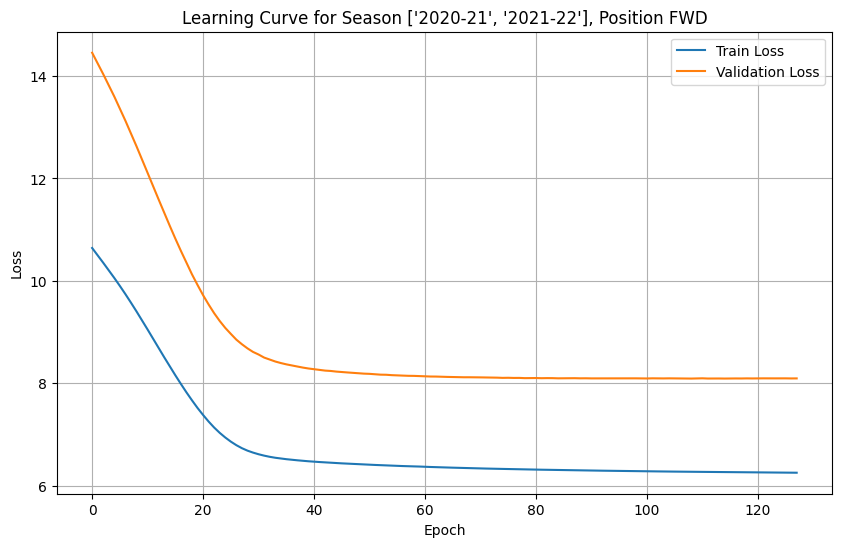

X input shape:
(6, 8)
d input shape:
(1,)


c:\Users\Dean\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\onnx\symbolic_opset9.py:4545: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with RNN_TANH can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  warnings.warn(


(rnnModel(
   (flatten): Flatten(start_dim=1, end_dim=-1)
   (rnn): RNN(8, 64, batch_first=True, bidirectional=True)
   (attention): TemporalAttention(
     (W): Linear(in_features=128, out_features=64, bias=False)
     (v): Linear(in_features=64, out_features=1, bias=False)
   )
   (linear_relu_stack): Sequential(
     (0): Linear(in_features=129, out_features=1, bias=True)
   )
 ),
 {'train_mse': 6.248578071594238,
  'train_mae': 1.603364412782458,
  'val_mse': 8.092839241027832,
  'val_mae': 1.8279945755838065,
  'test_mse': 6.484151363372803,
  'test_mae': 1.5050135203408168,
  'spear_corr': 0.6344066302604251})

In [14]:
SEED = 444

random.seed(SEED)
torch.manual_seed(SEED)
np.random.seed(SEED)

DATA_DIR = os.path.join(os.getcwd(), '..', 'data', 'clean_data')

full_rnn_pipeline(DATA_DIR,
                season = ['2020-21', '2021-22'], 
                position = 'FWD', 
                window_size=6,
                num_filters=64,
                num_dense=64,
                bidirectional=True,
                temporal_attention=True,
                batch_size = 32,
                epochs = 2000,  
                drop_low_playtime = True,
                low_playtime_cutoff = 1e-6,
                num_features = NUM_FEATURES_DICT["FWD"]["large"],
                cat_features = STANDARD_CAT_FEATURES, 
                stratify_by = 'stdev', 
                conv_activation = 'relu',
                dense_activation = 'relu',
                optimizer='adam',
                learning_rate= 0.00001,  
                loss = 'mse',
                metrics = ['mae'],
                verbose = True,
                regularization = 0.01, 
                early_stopping = True, 
                tolerance = 1e-5, # only used if early stopping is turned on, threshold to define low val loss decrease
                patience = 20,   # num of iterations before early stopping bc of low val loss decrease
                plot = True, 
                draw_model = False,
                standardize= True,)

# GridSearch for Best Model

In [ ]:
from premier_league_models.rnn.experiment import gridsearch_rnn

gridsearch_rnn(experiment_name = "rnn_eval_big", verbose = True)

#PERFORMING VIA COMMAND LINE SCRIPT NOW FOR EFFICIENCY